In [6]:
import numpy
import scipy
import scipy.linalg
import pylab

In [2]:
%matplotlib notebook

In [148]:
# Generate some data
N = 10000
A_size = 10
B_size = 20
C_size = 30
latent_size = 5
latent_within_size = 2
latent_within_strength = 0
NOISE = 0.5

latent_variables = numpy.random.normal(size=(N,latent_size))
A_coeffs = scipy.linalg.block_diag(*[numpy.ones((1,A_size//latent_size))/(i+1) for i in range(latent_size)])
B_coeffs = scipy.linalg.block_diag(*[numpy.ones((1,B_size//latent_size))/(i+1) for i in range(latent_size)])
C_coeffs = scipy.linalg.block_diag(*[numpy.ones((1,C_size//latent_size))/(i+1) for i in range(latent_size)])
A_latent_variables = numpy.random.normal(size=(N,latent_within_size))
B_latent_variables = numpy.random.normal(size=(N,latent_within_size))
C_latent_variables = numpy.random.normal(size=(N,latent_within_size))
A_within_coeffs = numpy.random.normal(size=(latent_within_size, A_size))*latent_within_strength
B_within_coeffs = numpy.random.normal(size=(latent_within_size, B_size))*latent_within_strength
C_within_coeffs = numpy.random.normal(size=(latent_within_size, C_size))*latent_within_strength
A = latent_variables @ A_coeffs + A_latent_variables @ A_within_coeffs + numpy.random.normal(size=(N,A_size))*NOISE
B = latent_variables @ B_coeffs + B_latent_variables @ B_within_coeffs + numpy.random.normal(size=(N,B_size))*NOISE
C = latent_variables @ C_coeffs + C_latent_variables @ C_within_coeffs + numpy.random.normal(size=(N,C_size))*NOISE

In [149]:
from statsmodels.multivariate import cancorr
cca_AB = cancorr.CanCorr(A,C)

<IPython.core.display.Javascript object>


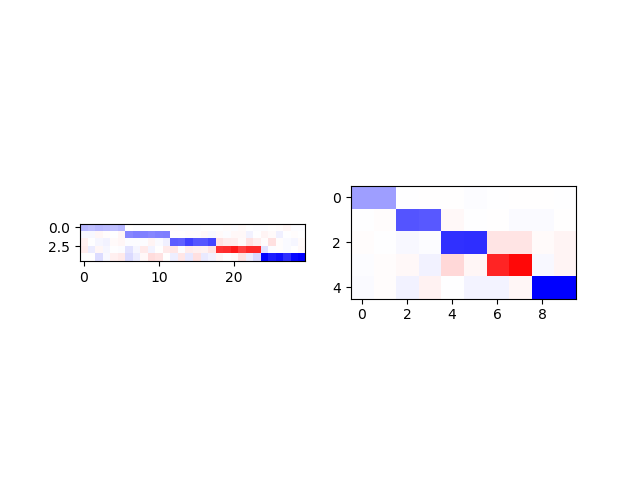

In [150]:
fig, (ax1,ax2) = pylab.subplots(ncols=2)
M = numpy.max(numpy.abs(cca_AB.x_cancoef[:,:5]))
ax1.imshow(cca_AB.x_cancoef.T[:5], vmin=-M,vmax=M, cmap="bwr")
M = numpy.max(numpy.abs(cca_AB.y_cancoef[:,:5]))
ax2.imshow(cca_AB.y_cancoef.T[:5], vmin=-M,vmax=M, cmap="bwr")

<IPython.core.display.Javascript object>


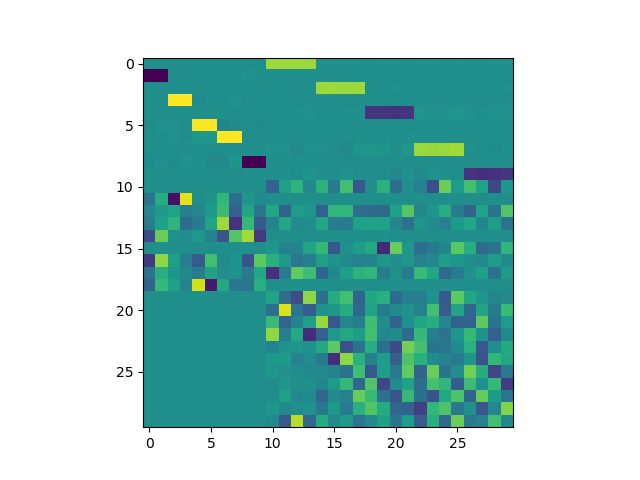

In [152]:
blocks = [[a.T@b for b in (A,B)] for a in (A,B)]#[[A.T@A, A.T@B], [B.T@A,B.T@B]]
mat = numpy.block(blocks)
offdiag = [[blocks[i][j]  if j != i else numpy.zeros(blocks[i][j].shape)
                for j,m in enumerate(row)]
                for i,row in enumerate(blocks)]
mat = numpy.block(offdiag)
u,d,vT = numpy.linalg.svd(mat)
pylab.figure()
pylab.imshow(vT)

<IPython.core.display.Javascript object>


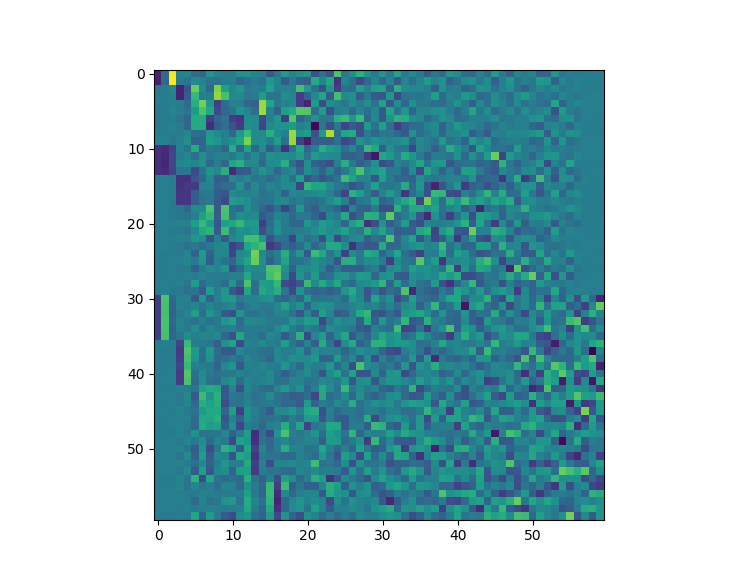

In [147]:
pylab.figure()
pylab.imshow(u)